In [1]:
import xarray as xr
import glob
import get_Amaps as amap
import get_BCDEmaps as bcde
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt

A: simple average in modern period (1980-2014)  
B: Model minus default 
C: Model minus observations  
D: Modern minus preindustrial (aka modern-preindustrial change aka MPC)  
E: Model MPC minus default MPC

In [5]:
# Read in modern period file (1980-2014 in this example)
tasmax = xr.open_dataset("../sample_data/day/tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_19500101-20141231.nc").sel(time=slice("1980", "2014"))

In [6]:
# We want to get # annual days > 40C so we use the t40C function from  amap
t40C = amap.t40C(tasmax, "tasmax", 1)
# Note the amap functions look to the "units" attribute of your variable to do any conversions
# for T40C and FD, it expects units == 'C', but if you have units K or F it will convert to C for you
# If your variable is missing the attribute you can pass it through with 'units' arg like this...
t40C = amap.t40C(tasmax, "tasmax", 1, units="K") # Note - if the units are not recognized, it will quit 
# lets take the time mean (which is an example of an "A" map)
t40C_tmean = t40C.t40C.mean("time")

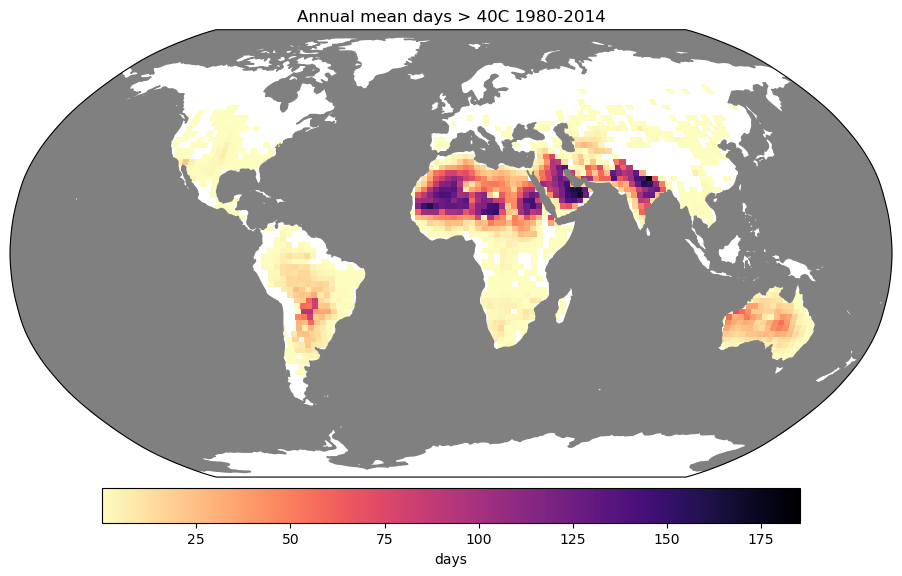

In [14]:
# Plot shows average days > 40C for 1980-2014 period for this simulation
fig, ax = plt.subplots(figsize=(15, 7), subplot_kw={'projection': ccrs.Robinson()})
t40C_zerodaysmasked = t40C_tmean.where(t40C_tmean>0) # mask days where t40C = 0 to make them white on the plot
t40C_zerodaysmasked.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="magma_r", zorder=1, 
                         cbar_kwargs={"label": "days", "shrink": 0.6, "orientation": "horizontal", "pad": 0.02})
ax.add_feature(cfeature.OCEAN, color="grey", zorder=2)
plt.title("Annual mean days > 40C 1980-2014");

In [2]:
# Example of precip-based field
pr =  xr.open_dataset("../sample_data/day/pr_day_GISS-E2-1-G_historical_r1i1p1f2_gn_19500101-20141231.nc").sel(time=slice("1980", "2014"))

In [10]:
# just for an example, if units are not recognized, it gets upset and tells you why
amap.r10mm(pr, "pr", 1, units="WRONG UNITS")

SystemExit: !~~~~~~~~~~~~~~~~ Error processing ~~~~~~~~~~~~~~~~! 
 pr 'units' attribute: WRONG UNITS is not recognized 
 Valid attributes for this variable are 'mm/day' and 'kg m-2 s-1'
 Convert your data to either of these units and update the metadata

/home/mypcpls/anaconda3/envs/geo/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
# get # annual days > 10mm
r10mm = amap.r10mm(pr, "pr", 1)
r10mm_tmean = r10mm.r10mm.mean("time")

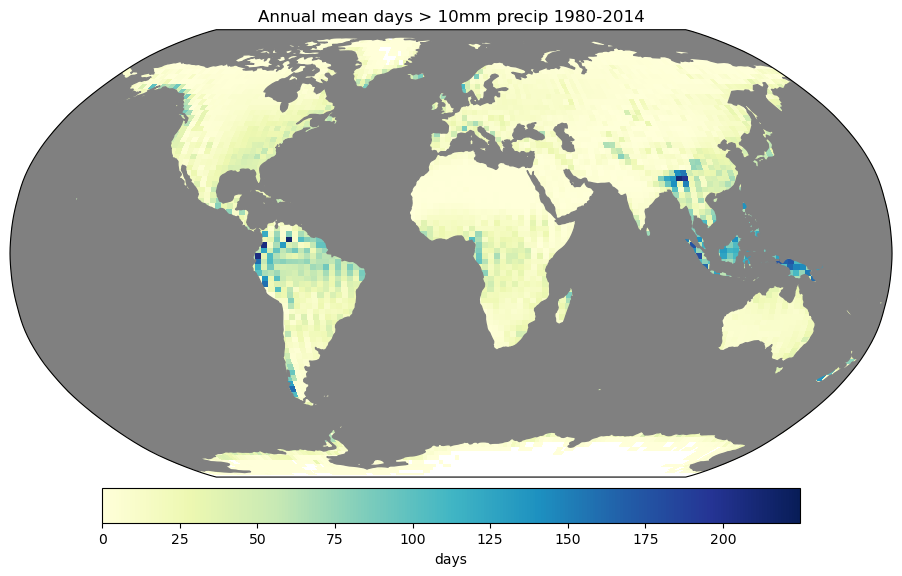

In [25]:
# Plot shows average days > 40C for 1980-2014 period for this simulation
fig, ax = plt.subplots(figsize=(15, 7), subplot_kw={'projection': ccrs.Robinson()})
r10mm_zerodaysmasked = r10mm_tmean.where(r10mm_tmean>0) # mask days where t40C = 0 to make them white on the plot
r10mm_zerodaysmasked.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="YlGnBu", vmin=0, 
                          zorder=1, cbar_kwargs={"label": "days", "shrink": 0.6, "orientation": "horizontal", "pad": 0.02})
ax.add_feature(cfeature.OCEAN, color="grey", zorder=2)
plt.title("Annual mean days > 10mm precip 1980-2014");

## MISC tips, extra processing  
#### To get B, C, D, and E maps, you can used the simple function bcde.bcde_map()
 - it is a simple ds2 - ds1 where each dataset should be a time mean
#### For examples of how to do the significance testing with ensemble members see get_signif_AD.ipynb and get_signif_BE.ipynb
- unforunately, I havent had time to package these up nicely, so for now, hopefully my rushed process can be implemented
- Note: The NINT ensemble used in this example was created via concatenated ModelE ACC files so they do not have the same format as the CMORized CMIP6 files  
#### For Observations comparisons, you will have to regrid the data first
- I used cdo (>cdo remapcon,[target grid netcdf file] infile.nc outfile.nc)
- You can regrid from coarse to fine or vice versa. I regridded obs to the coarse modelE grid because it resulted in less grainy maps and was consistent with model-model comparisons  
#### I have tons more scripts I created to map model numbers based on file names, create figures, generate monthly CIDs, etc. But these scripts will hopefully be enough to get you going